### Breast Cancer Simple (kNNs, Decision Trees, Naive Bayes)

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
import joblib

from sklearn.metrics import accuracy_score

### Load the Dataset

In [18]:
df = pd.read_csv(r'D:\lums\work stuff\notebooks\Week 2\Breast_Cancer\breast-cancer.csv')

# Drop Id column
df.drop(columns=['id'], inplace=True)

# Convert diagnosis to binary classification (0 or 1)
df['diagnosis'] = df['diagnosis'].map({'M' : 1, 'B' : 0})  
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
# Check for missing values
print(df.isnull().sum())

# Check duplicates
duplicates = df.duplicated()
# View how many duplicate rows exist
print("Number of duplicate rows:", duplicates.sum())


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Number of duplicate rows: 0


In [20]:
# Replace whitespaces in all column names with underscores
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Visualizing the Dataset

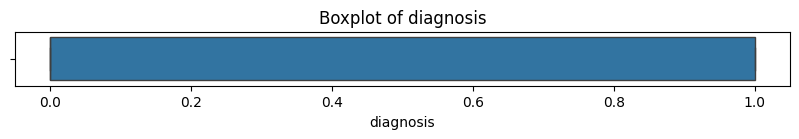

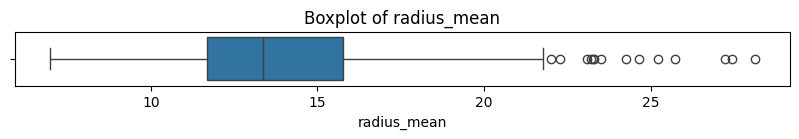

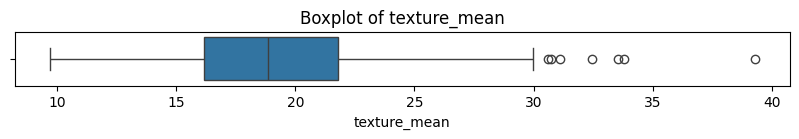

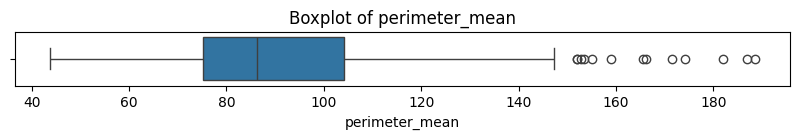

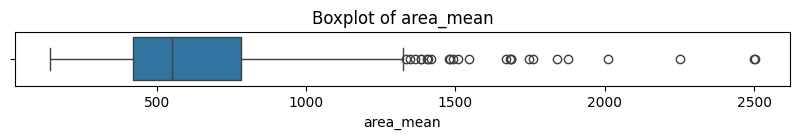

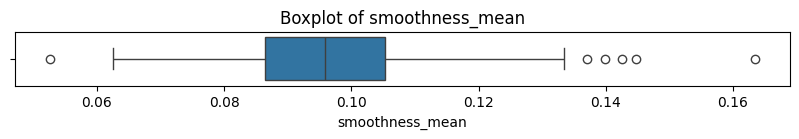

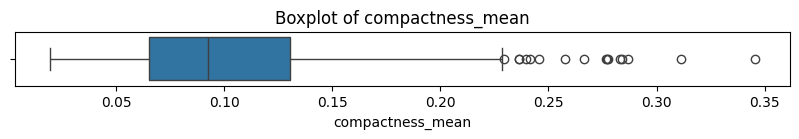

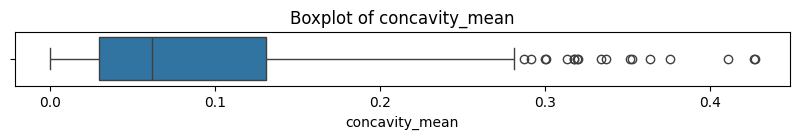

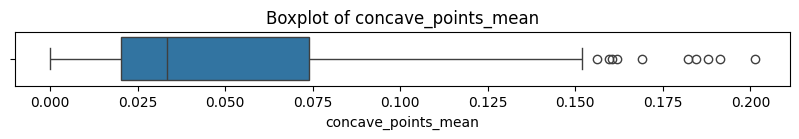

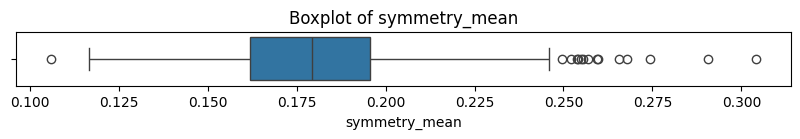

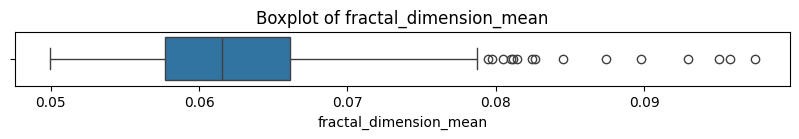

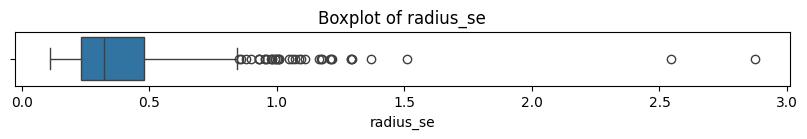

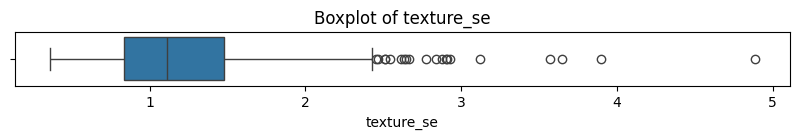

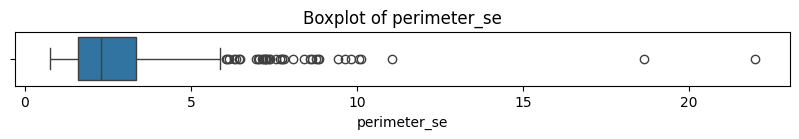

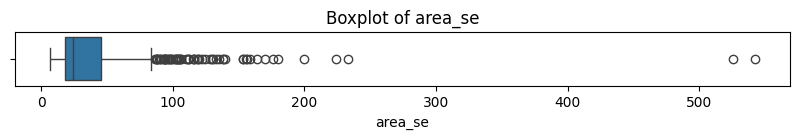

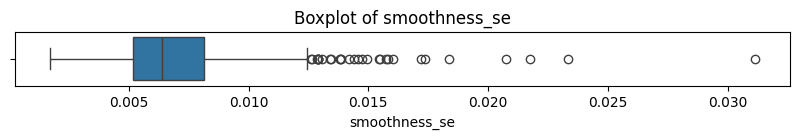

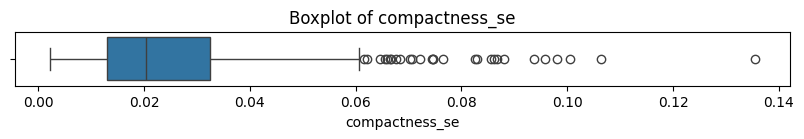

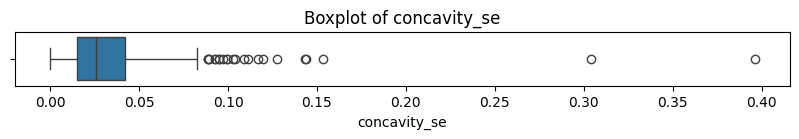

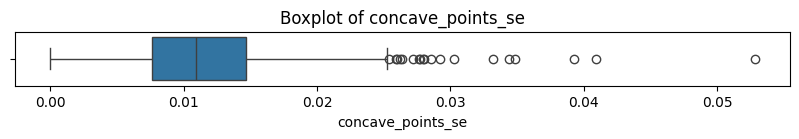

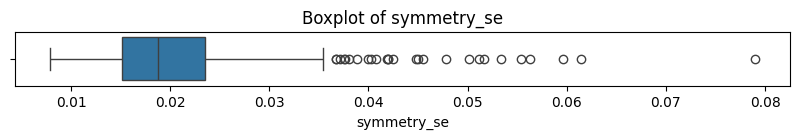

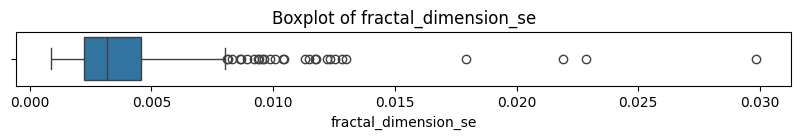

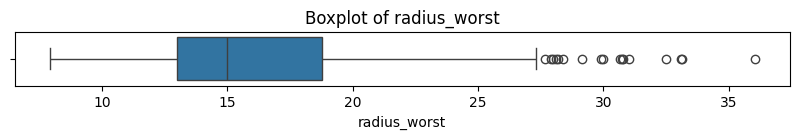

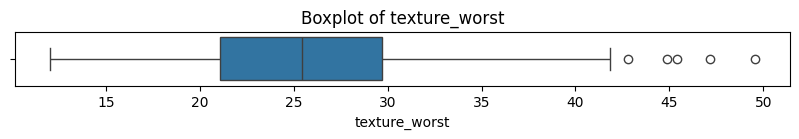

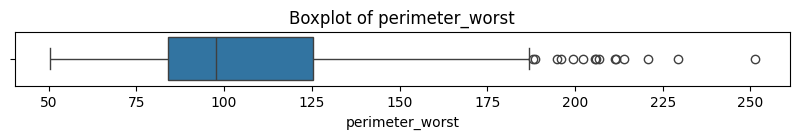

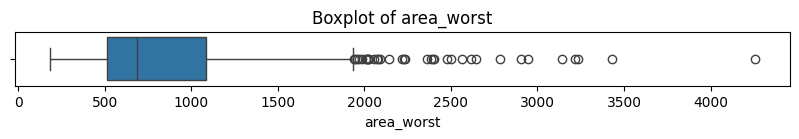

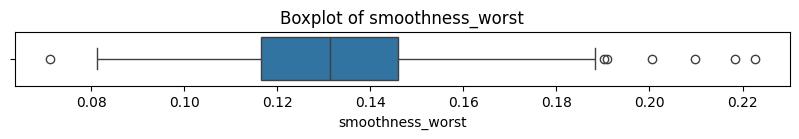

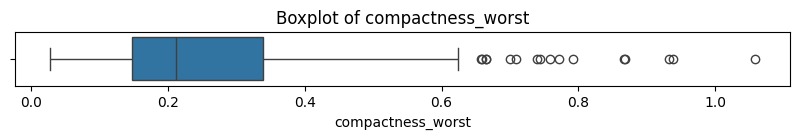

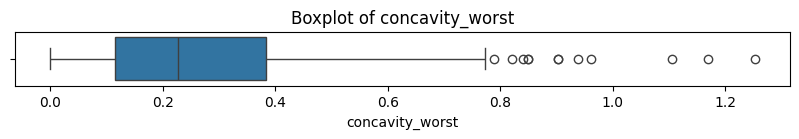

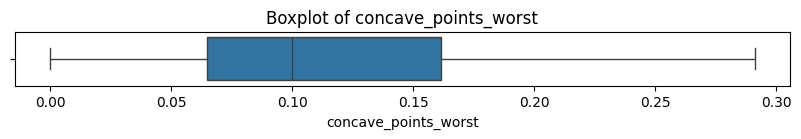

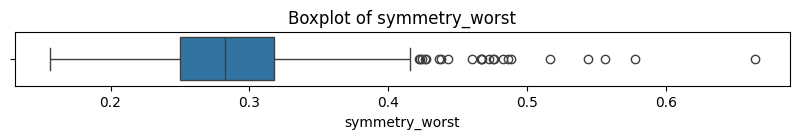

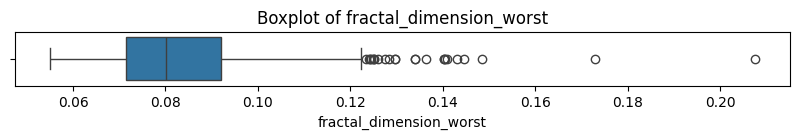

In [21]:
# Visualizing outliers
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 0.7))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

### Correlations

In [22]:
df.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave_points_worst       0.793566
perimeter_worst            0.782914
concave_points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave_points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [23]:
# Function to drop features with low correlation with target
def drop_low_corr_features(df, threshold=0.1):
    # Exclude the target
    correlations = df.corr()['diagnosis'].drop('diagnosis')
    
    # Find low-correlation features
    low_corr_features = correlations[abs(correlations) < threshold].index
    
    print("Dropped features: ", low_corr_features.tolist())
    
    # Drop them from the DataFrame
    df = df.drop(columns=low_corr_features)
    return df

df = drop_low_corr_features(df)
df['diagnosis'].value_counts()

Dropped features:  ['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se']


diagnosis
0    357
1    212
Name: count, dtype: int64

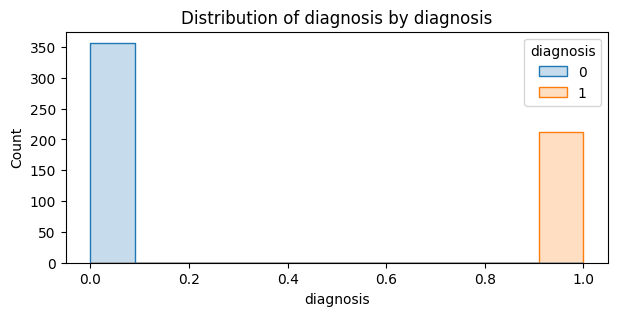

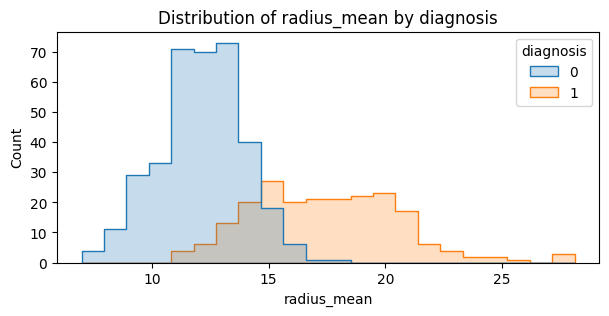

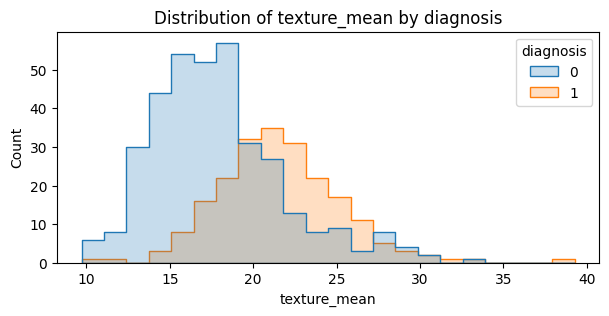

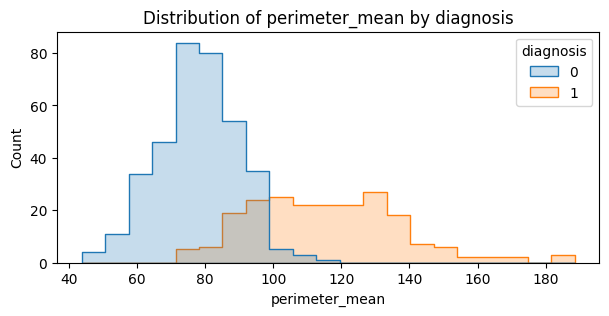

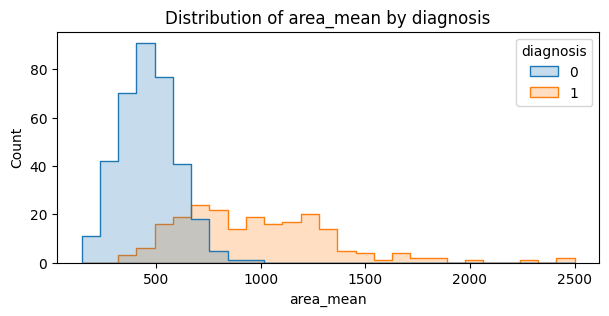

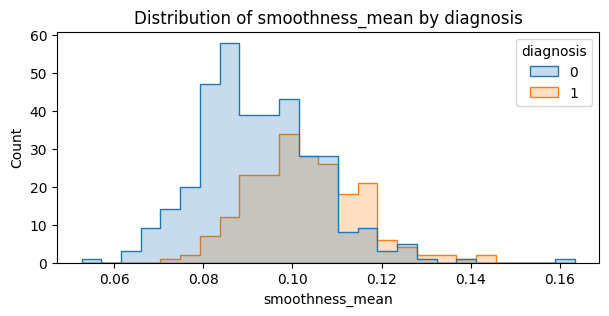

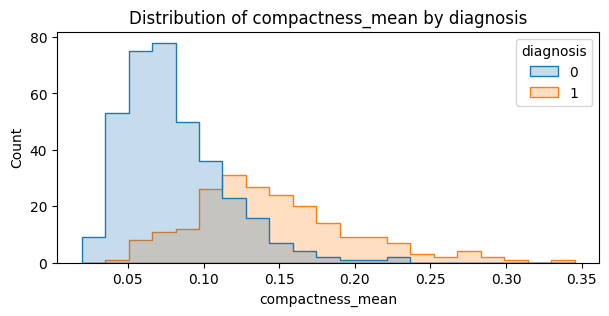

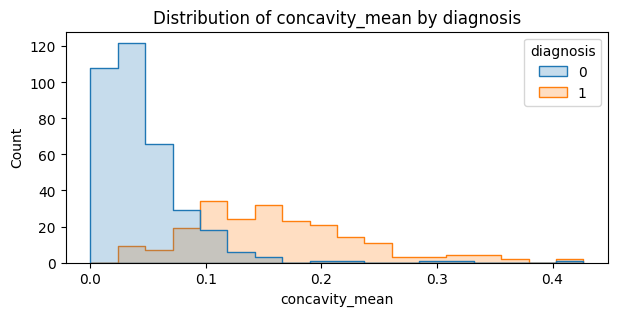

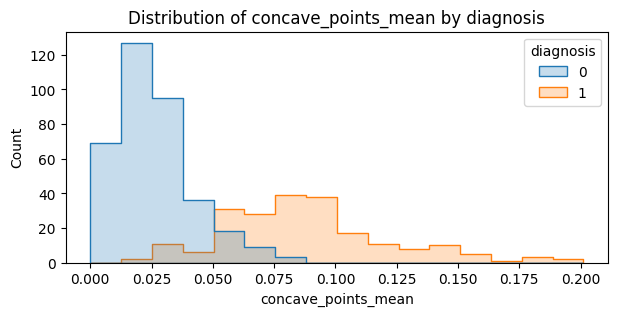

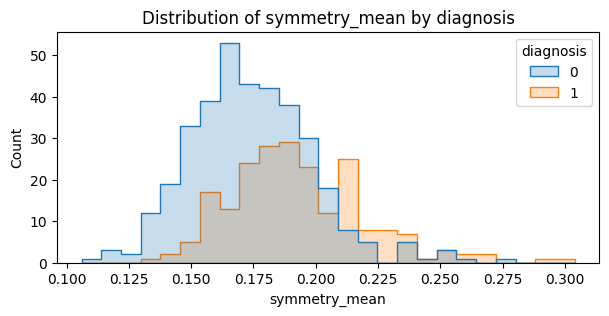

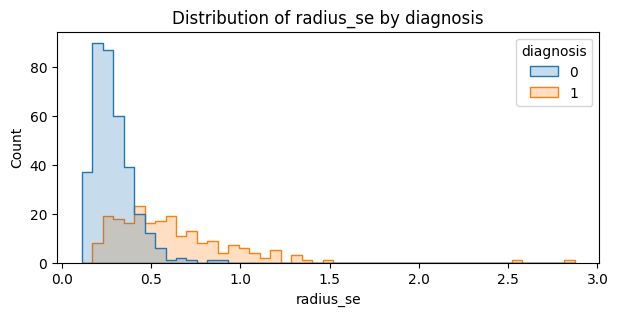

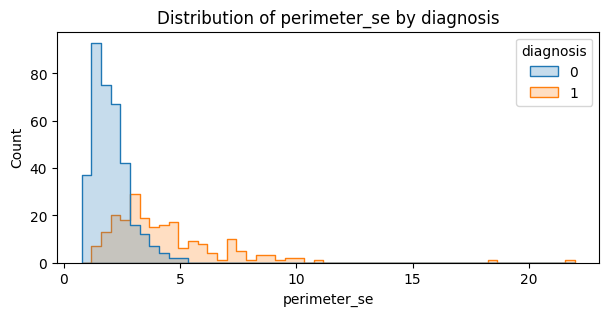

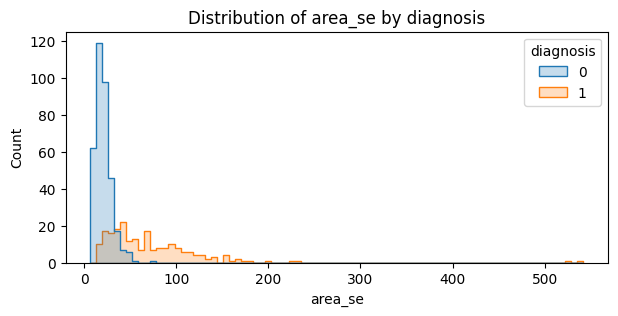

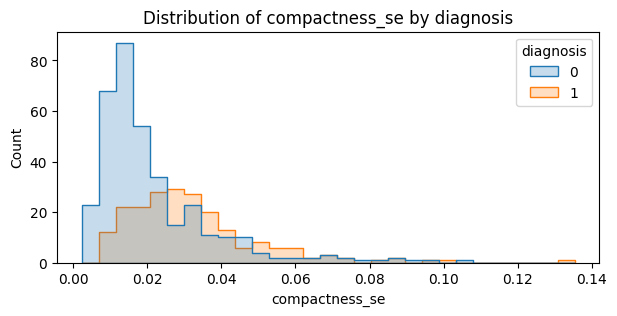

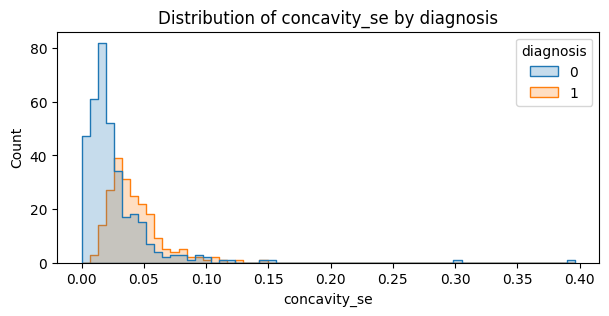

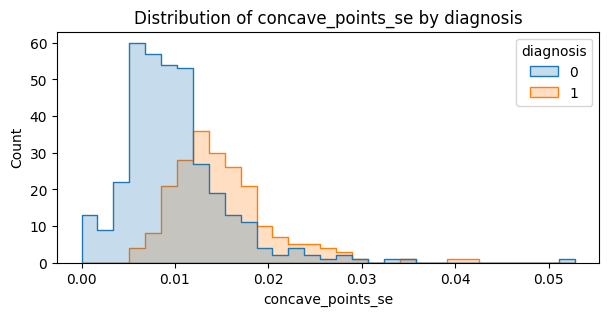

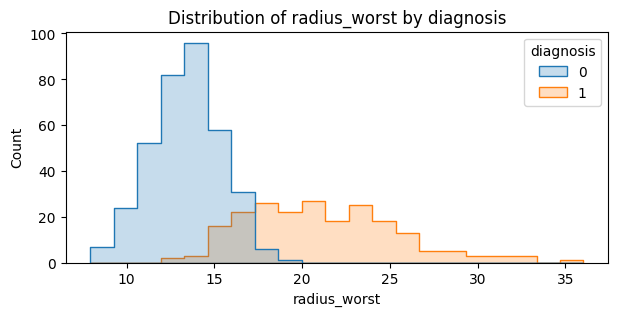

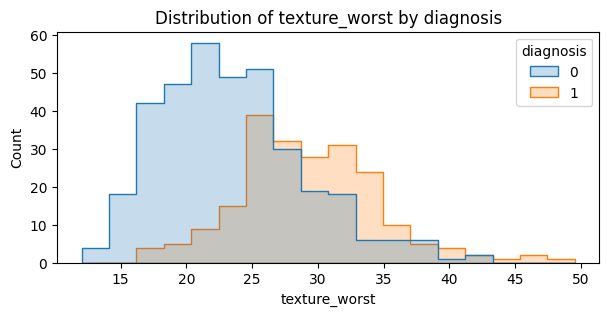

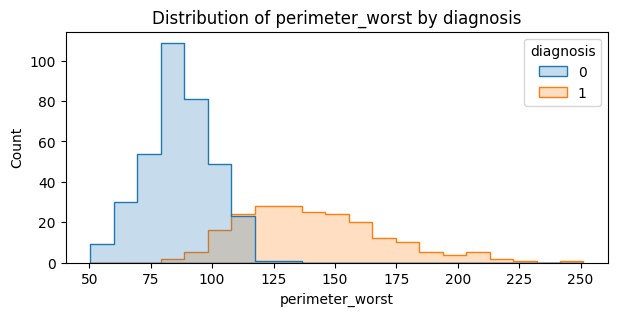

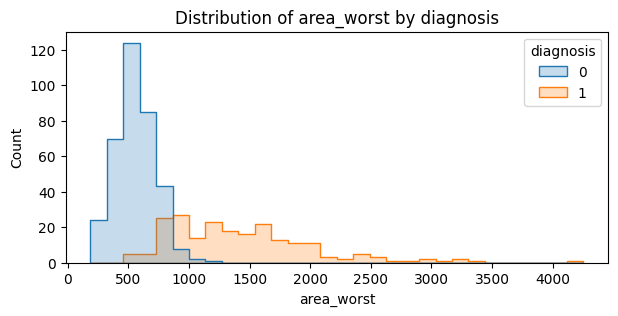

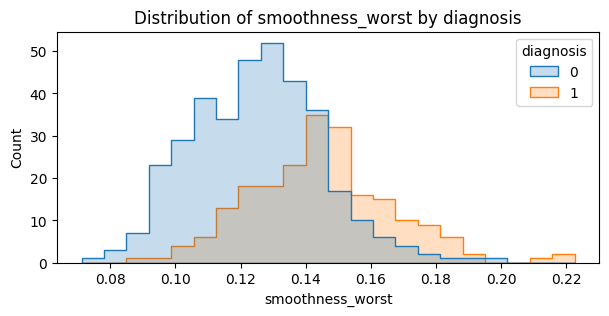

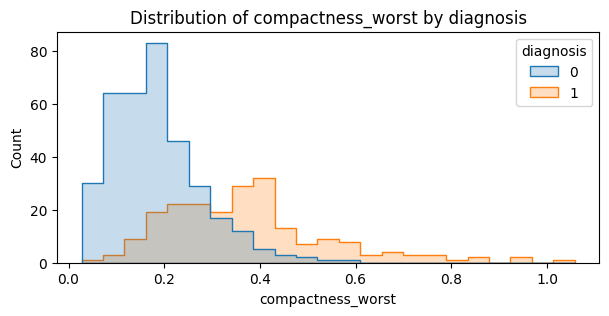

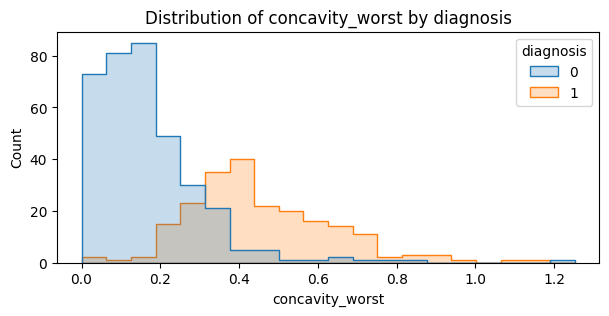

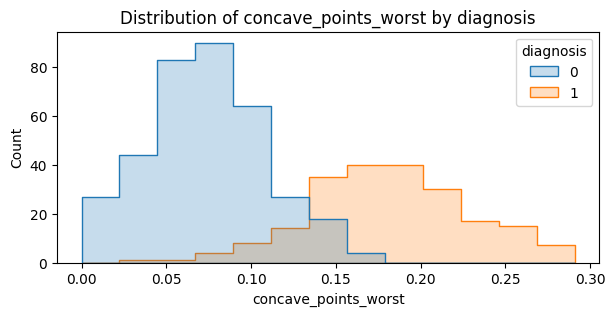

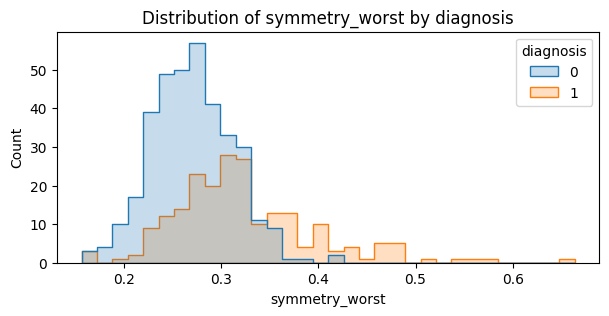

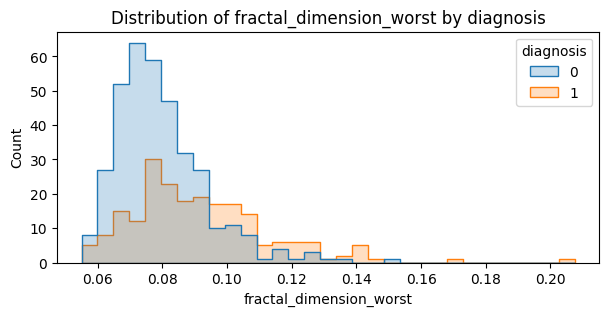

In [24]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(7, 3))
    sns.histplot(data=df, x=column, hue='diagnosis', element='step')
    plt.title(f'Distribution of {column} by diagnosis')
    plt.show()

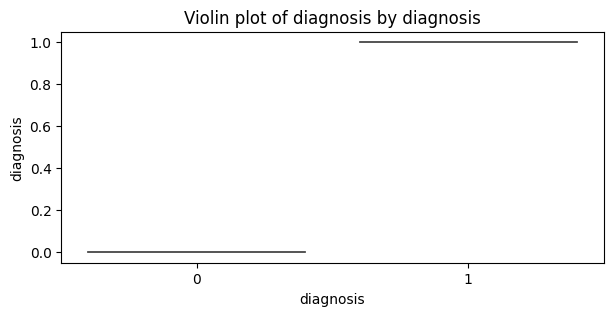

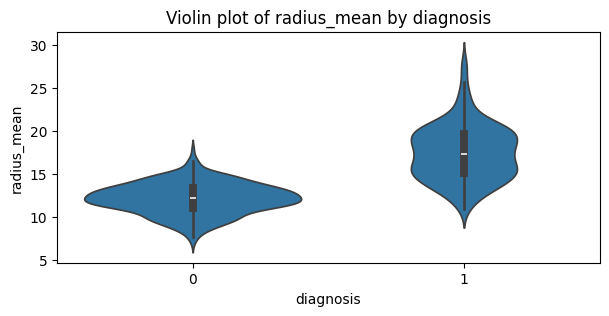

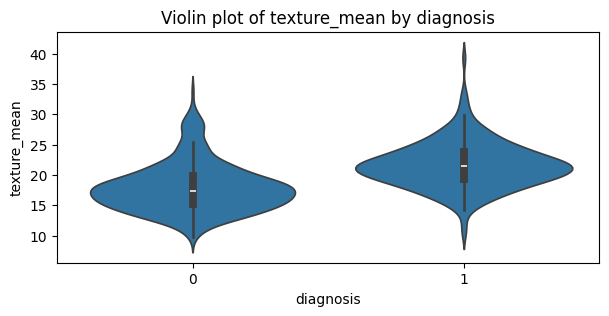

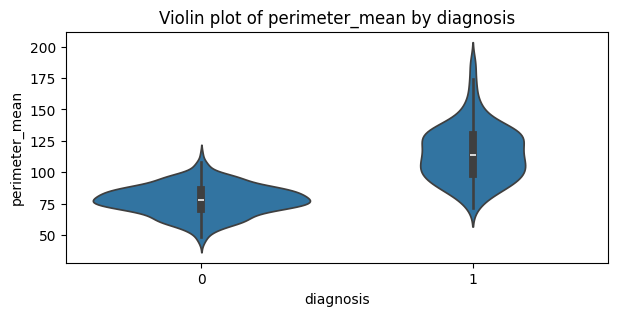

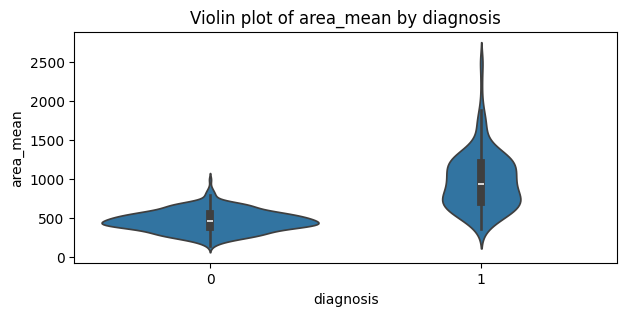

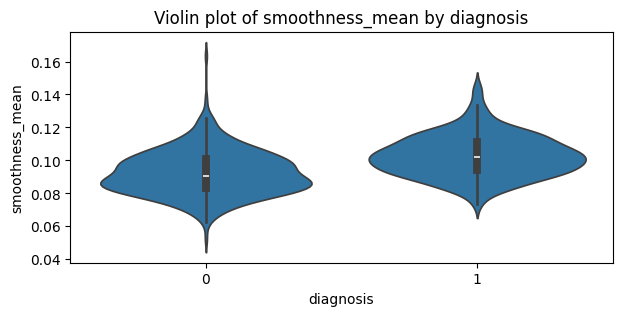

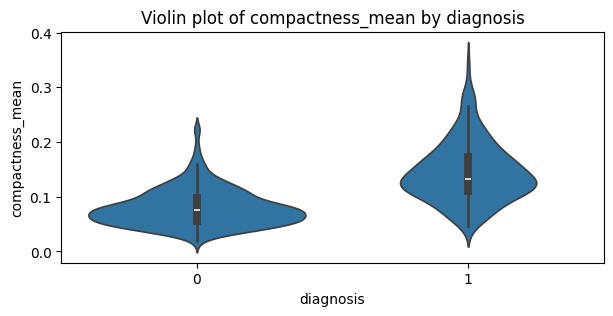

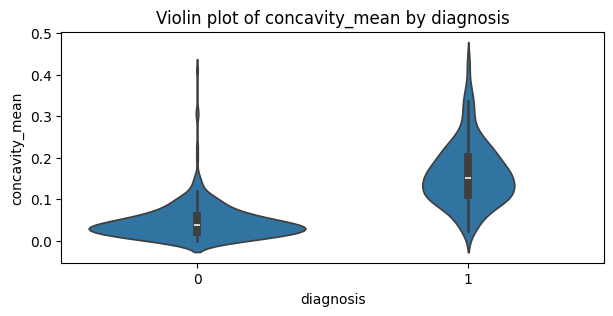

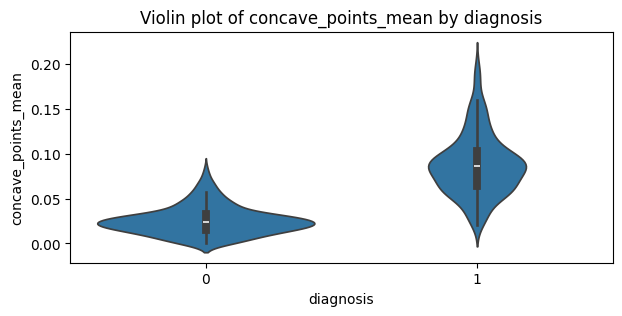

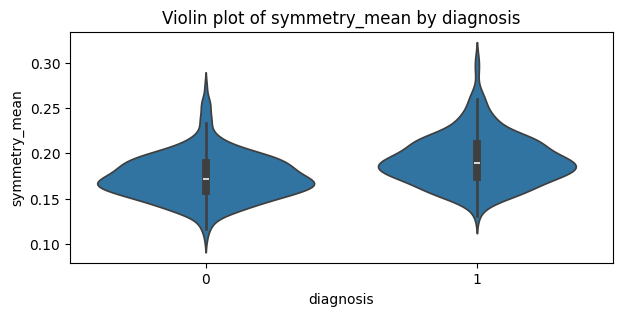

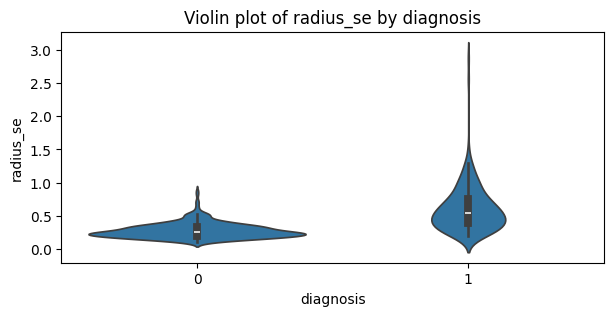

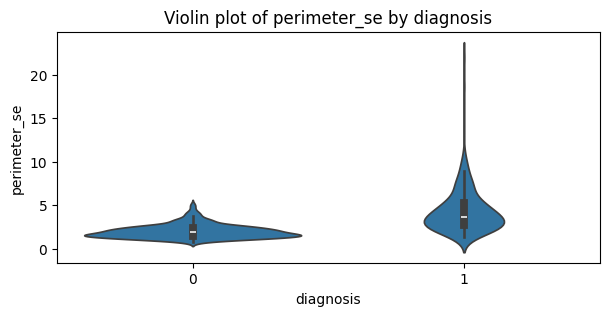

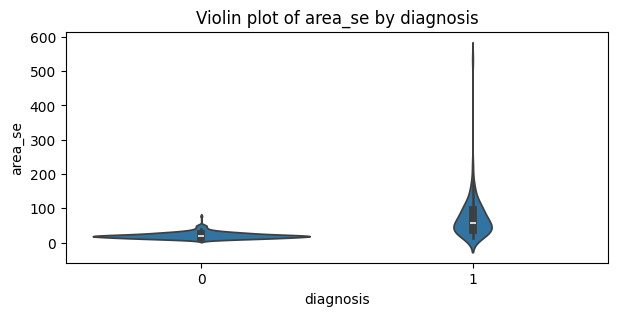

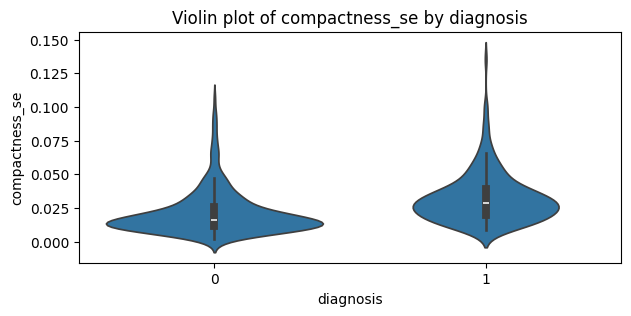

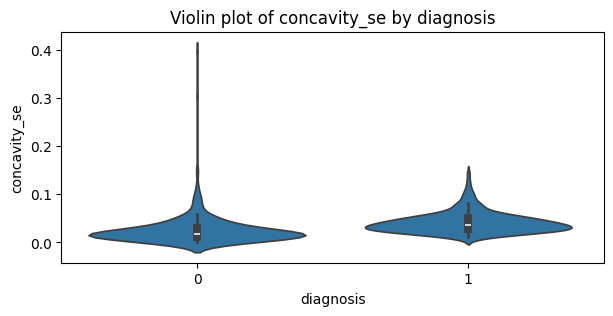

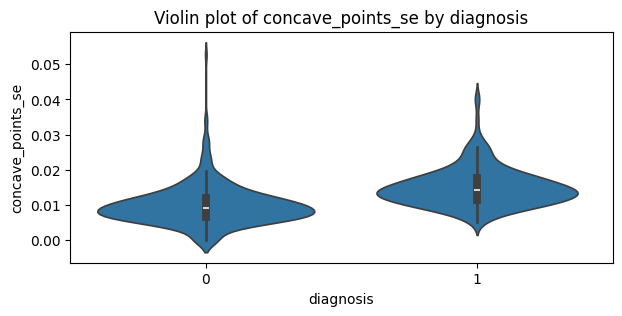

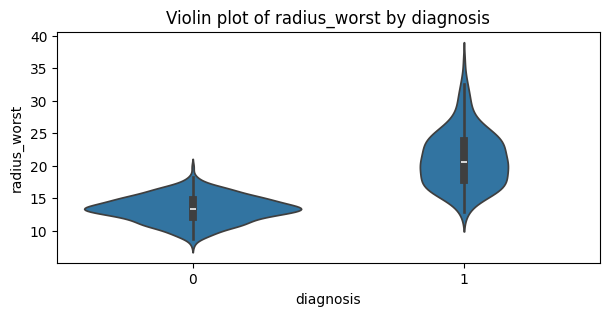

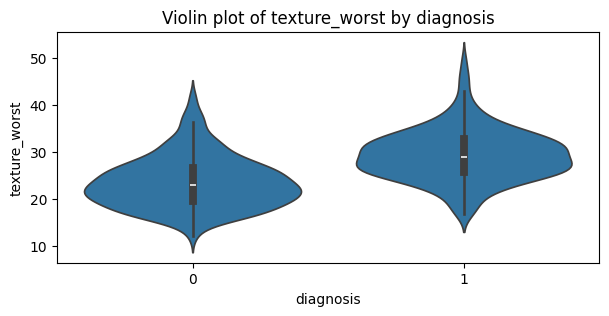

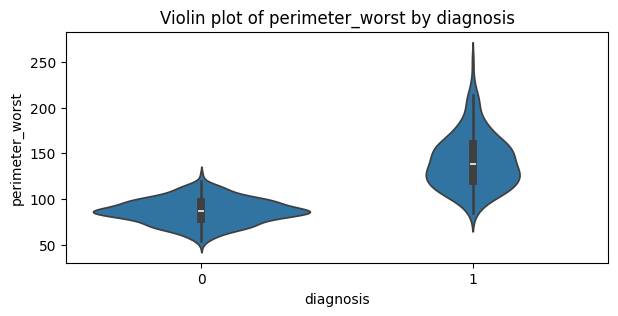

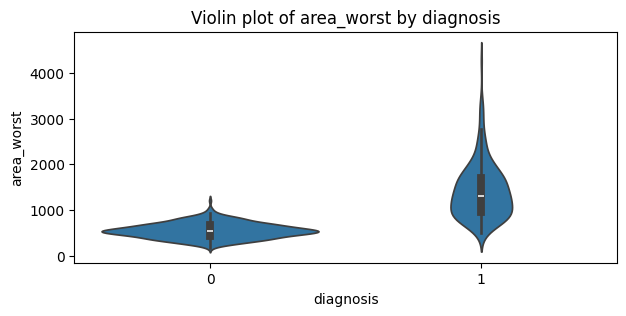

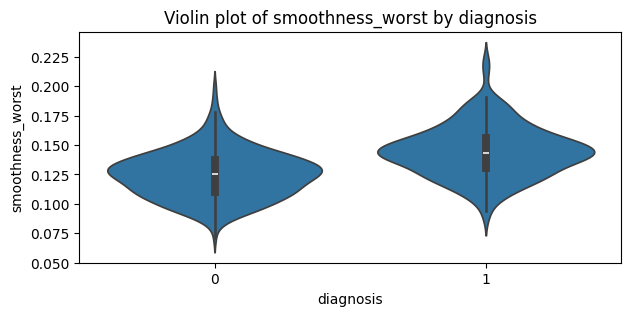

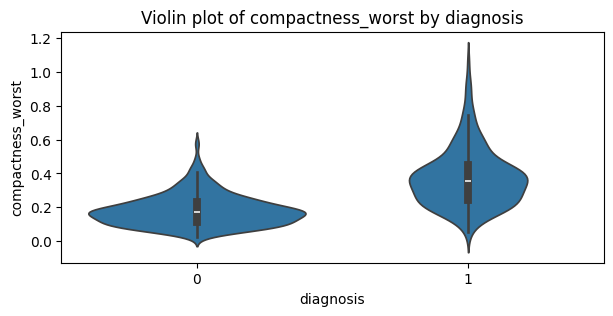

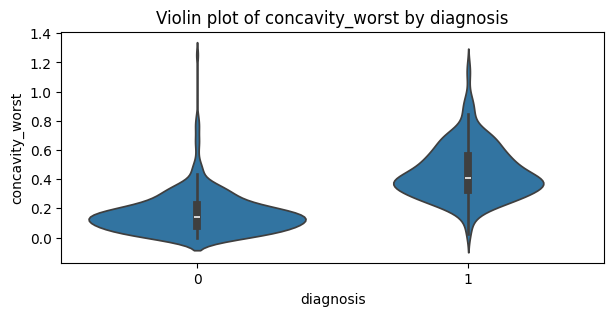

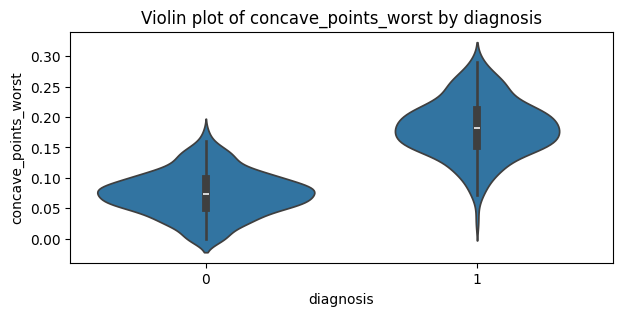

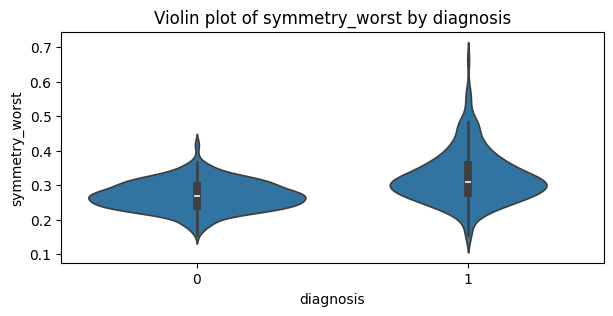

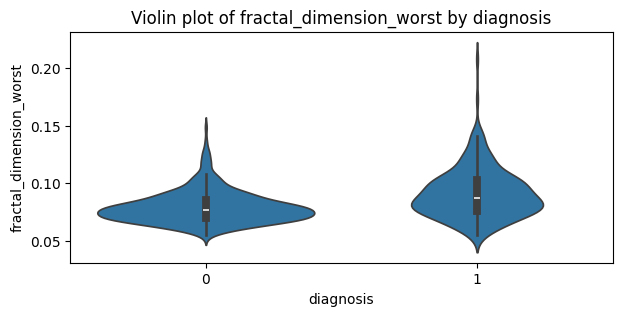

In [25]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(7, 3))
    sns.violinplot(x='diagnosis', y=column, data=df)
    plt.title(f'Violin plot of {column} by diagnosis')
    plt.show()

### MultiCollinearity

In [26]:
# def check_multicollinearity_and_drop(df, target_column, threshold=1.0):
#     # Compute correlation matrix
#     corr_matrix = df.corr()

#     # Identify high-correlation pairs
#     high_corr_pairs = []
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) > threshold:
#                 col1 = corr_matrix.columns[i]
#                 col2 = corr_matrix.columns[j]
#                 if col1 != target_column and col2 != target_column:
#                     high_corr_pairs.append((col1, col2))

#     # Step 3: Compare correlation with target and keep the more relevant one
#     to_drop = set()
#     for col1, col2 in high_corr_pairs:
#         corr_with_target_1 = abs(df[col1].corr(df[target_column]))
#         corr_with_target_2 = abs(df[col2].corr(df[target_column]))
#         if corr_with_target_1 < corr_with_target_2:
#             to_drop.add(col1)
#         else:
#             to_drop.add(col2)

#     # Step 4: Drop the columns
#     df_dropped = df.drop(columns=to_drop)

#     return df_dropped, list(to_drop)

# # Example usage:
# df_reduced, dropped_features = check_multicollinearity_and_drop(df, target_column='diagnosis')

# print("Dropped features due to multicollinearity:", dropped_features)

# df = df_reduced
# sns.heatmap(df.corr(), annot=True)
# plt.show()

### Removing Outliers

In [27]:
# 🧹 Function to remove outliers from numeric feature columns only (not the target)
def remove_outliers(df, threshold=2.2):
    df_out = df.copy()
    
    # Exclude the target column from outlier detection
    numeric_cols = df_out.select_dtypes(include=[np.number]).columns.drop('diagnosis')
    
    outlier_indices = set()
    
    for column in numeric_cols:
        Q1 = df_out[column].quantile(0.25)
        Q3 = df_out[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Identify outliers in this column
        outliers = df_out[(df_out[column] < lower_bound) | (df_out[column] > upper_bound)].index
        outlier_indices.update(outliers)
    
    # Drop rows that were outliers in any column
    df_cleaned = df_out.drop(index=outlier_indices)
    return df_cleaned

# 📉 Remove outliers and display class balance
print("Shape before removing outliers:", df.shape)
print("Class balance before:\n", df['diagnosis'].value_counts())

df = remove_outliers(df)

print("Shape after removing outliers:", df.shape)
print("Class balance after:\n", df['diagnosis'].value_counts())


Shape before removing outliers: (569, 26)
Class balance before:
 diagnosis
0    357
1    212
Name: count, dtype: int64
Shape after removing outliers: (491, 26)
Class balance after:
 diagnosis
0    344
1    147
Name: count, dtype: int64


### Preprocessing

In [28]:
X = df.drop(columns=['diagnosis'])
print(X.columns)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Update numeric_features and preprocessor to use only selected features
numeric_features = X.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave_points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [29]:
model_params = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'classifier__max_depth': [2, 3, 5, 7, 10, 15, 20, None],
            'classifier__min_samples_split': [2, 3, 5, 7, 10, 15, 20],
            'classifier__min_samples_leaf': [1, 2, 4, 6, 8]
        }
    },
    'kNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': list(range(1, 31)),  # Try 1 to 30 neighbors
            'classifier__weights': ['uniform', 'distance'],
            'classifier__p': [1, 2, 3, 4, 5]  # Manhattan, Euclidean, etc.
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            'classifier__var_smoothing': [1e-9, 1e-10, 1e-11, 1e-8, 1e-7, 1e-6]
        }
    }
}

### Training the model using Gridsearch

In [30]:
# Run grid search for each model on full X_train/X_test (pipeline will select features)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, mp in model_params.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', mp['model'])
    ])
    grid = GridSearchCV(pipe, mp['params'], cv=skf)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Save the best pipeline for this model
    joblib.dump(best_model, f"breast_cancer_{name.replace(' ', '_').lower()}.joblib")

    print(f"🔍 {name} Results")
    print("Best CV Accuracy:", grid.best_score_)
    print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
    print("Best Params:", grid.best_params_)
    print("-" * 50)

🔍 Decision Tree Results
Best CV Accuracy: 0.9489776046738072
Test Set Accuracy: 0.9494949494949495
Best Params: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
--------------------------------------------------
🔍 kNN Results
Best CV Accuracy: 0.9668614086335605
Test Set Accuracy: 0.98989898989899
Best Params: {'classifier__n_neighbors': 5, 'classifier__p': 2, 'classifier__weights': 'uniform'}
--------------------------------------------------
🔍 Naive Bayes Results
Best CV Accuracy: 0.936222005842259
Test Set Accuracy: 0.9494949494949495
Best Params: {'classifier__var_smoothing': 1e-09}
--------------------------------------------------


### Analysis

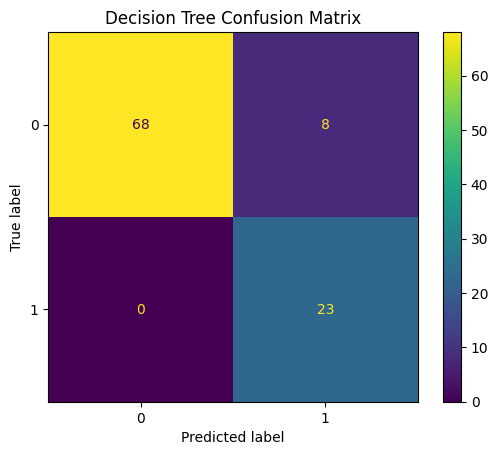

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        76
           1       0.74      1.00      0.85        23

    accuracy                           0.92        99
   macro avg       0.87      0.95      0.90        99
weighted avg       0.94      0.92      0.92        99

--------------------------------------------------


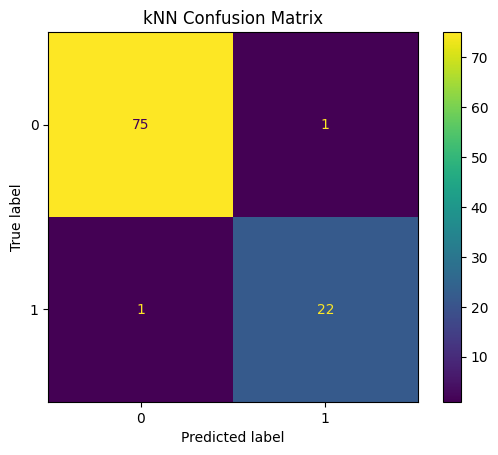

Classification Report for kNN:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       0.96      0.96      0.96        23

    accuracy                           0.98        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.98      0.98      0.98        99

--------------------------------------------------


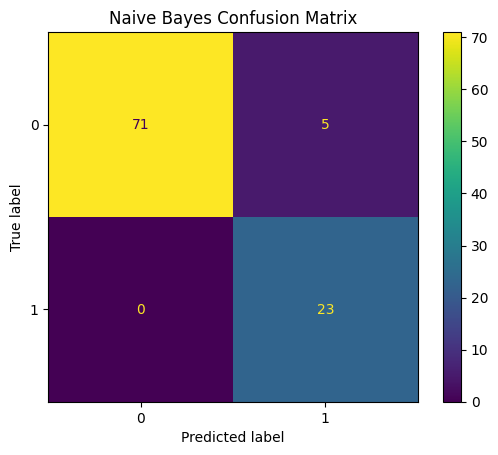

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        76
           1       0.82      1.00      0.90        23

    accuracy                           0.95        99
   macro avg       0.91      0.97      0.93        99
weighted avg       0.96      0.95      0.95        99

--------------------------------------------------


In [31]:
from sklearn.metrics import (
    ConfusionMatrixDisplay, roc_curve, auc, 
    precision_recall_curve, classification_report, accuracy_score
)

import matplotlib.pyplot as plt

# Store results for comparison
results = {}
roc_curves = {}
pr_curves = {}
reports = {}

for name, mp in model_params.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', mp['model'])
    ])
    grid = GridSearchCV(pipe, mp['params'], cv=5)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[name] = (fpr, tpr, auc(fpr, tpr))

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_curves[name] = (recall, precision)

    # Classification Report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 50)



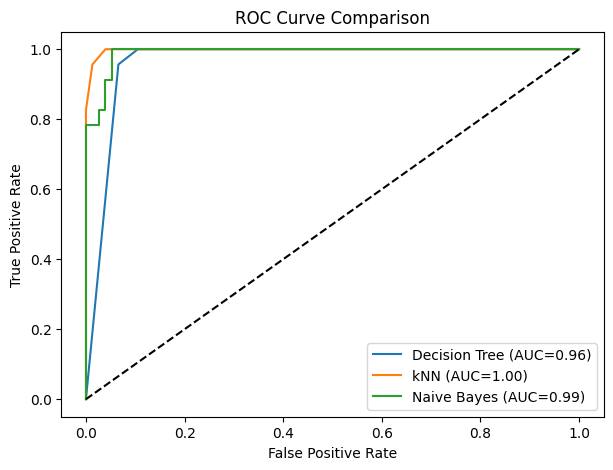

In [32]:
# Plot ROC Curves
plt.figure(figsize=(7,5))
for name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

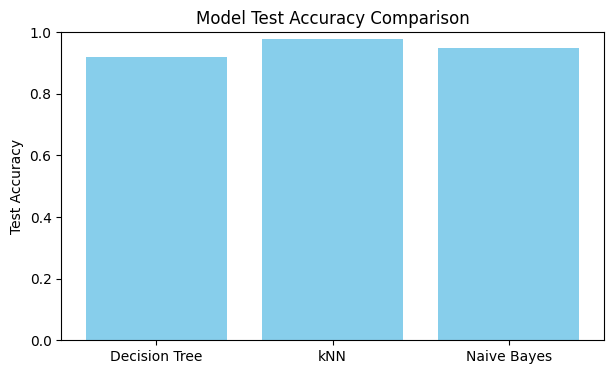

In [33]:
# Bar Plot of Test Accuracies
plt.figure(figsize=(7,4))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Test Accuracy")
plt.title("Model Test Accuracy Comparison")
plt.ylim(0, 1)
plt.show()